In [3]:
import tensorflow as tf

In [22]:
var = tf.random.uniform([1])
print(var.numpy())

[0.47136998]


In [23]:
def dataCreation(w=0.1 , b=0.5 , n=100):
    X = tf.random.uniform(shape = (100,))
    noise = tf.random.normal(shape = (n,),mean=0.0,stddev=0.01)
    Y = X*w + b + noise
    return X.numpy(),Y.numpy()
    
X,Y = dataCreation()

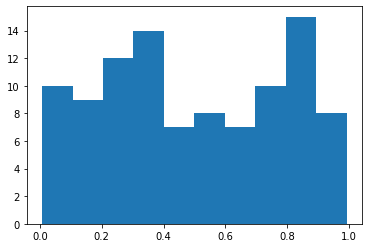

In [24]:
%matplotlib inline
import matplotlib.pyplot as mpl
mpl.hist(X)
mpl.show()

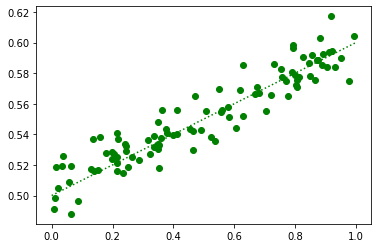

In [34]:
w = 0.1
b=0.5
mpl.plot(X,Y,'go')   # g for green and o for circle
mpl.plot([0,1], [0*w+b,1*w+b],'g:')

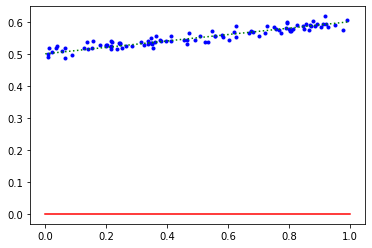

In [37]:
wGuess = 0.0
bGuess = 0.0
mpl.plot(X,Y,'b.')
mpl.plot([0,1], [0*w+b,1*w+b],'g:')
mpl.plot([0,1], [0*wGuess+bGuess,1*wGuess+bGuess],'r')

In [44]:
def predict(x , w=w , b=b):
    y = w * x + b
    return y

In [45]:
def meanSquaredError(yPred,Y):
    return tf.reduce_mean(tf.square(yPred - Y))

In [46]:
print(meanSquaredError(predict(X),Y))

tf.Tensor(0.00011089096, shape=(), dtype=float32)


In [47]:
wGuess = 0.1
bGuess = 0.5
print(meanSquaredError(predict(X),Y))

tf.Tensor(0.00011089096, shape=(), dtype=float32)


In [53]:
w = tf.Variable(0.0)
b = tf.Variable(-1.0)

learingRate = 0.1
steps = 200

for step in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X , w= w ,b=b)
        loss = meanSquaredError(predictions , Y)
        
    gradients = tape.gradient(loss , [w,b])
    
    w.assign_sub(gradients[0]*learingRate)
    b.assign_sub(gradients[1]*learingRate)
    
    if step%20==0:
        print("Step {}".format(step))

Step 0
Step 20
Step 40
Step 60
Step 80
Step 100
Step 120
Step 140
Step 160
Step 180


In [54]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.13012467>

In [55]:
b


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4853364>

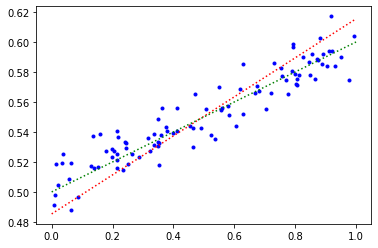

In [57]:
wTrue = 0.1
bTrue = 0.5
mpl.plot(X,Y,'b.')
mpl.plot([0,1], [0*w+b,1*w+b],'r:')
mpl.plot([0,1], [0*wTrue+bTrue,1*wTrue+bTrue],'g:')